In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_filename = 'kc_train.csv'
test_filename = 'kc_test.csv'
train_columns = ['date','price','bedroom','bathroom','room_area','park_area','floor','score','build_area','base_area','build_year','repair_year','weidu','jingdu']
test_colums = ['date','bedroom','bathroom','room_area','park_area','floor','score','build_area','base_area','build_year','repair_year','weidu','jingdu']

train = pd.read_csv(train_filename,names = train_columns)
test = pd.read_csv(test_filename,names = test_colums)

In [4]:
train['date'] = train['date'].astype('str')
test['date'] = test['date'].astype('str')

In [5]:
train['date'] = train['date'].apply(lambda x : x[0:4])
test['date'] = test['date'].apply(lambda x : x[0:4])

In [19]:
train['location'] = (train['weidu'] - train['jingdu'])*100
test['location'] = (test['weidu'] - test['jingdu'])*100

In [20]:
train

,date,price,bedroom,bathroom,room_area,park_area,floor,score,build_area,base_area,build_year,repair_year,weidu,jingdu,location
0,2015,545000,3,2.25,1670,6240,1.0,8,1240,430,1974,0,47.6413,-122.113,16975.43
1,2015,785000,4,2.50,3300,10514,2.0,10,3300,0,1984,0,47.6323,-122.036,16966.83
2,2015,765000,3,3.25,3190,5283,2.0,9,3190,0,2007,0,47.5534,-122.002,16955.54
3,2014,720000,5,2.50,2900,9525,2.0,9,2900,0,1989,0,47.5442,-122.138,16968.22
4,2014,449500,5,2.75,2040,7488,1.0,7,1200,840,1969,0,47.7289,-122.172,16990.09
5,2015,248500,2,1.00,780,10064,1.0,7,780,0,1958,0,47.4913,-122.318,16980.93
6,2015,675000,4,2.50,1770,9858,1.0,8,1770,0,1971,0,47.7382,-122.287,17002.52
7,2014,730000,2,2.25,2130,4920,1.5,7,1530,600,1941,0,47.5730,-122.409,16998.20
8,2014,311000,2,1.00,860,3300,1.0,6,860,0,1903,0,47.5496,-122.279,16982.86
9,2014,660000,2,1.00,960,6263,1.0,6,960,0,1942,0,47.6646,-122.202,16986.66


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
date           10000 non-null object
price          10000 non-null int64
bedroom        10000 non-null int64
bathroom       10000 non-null float64
room_area      10000 non-null int64
park_area      10000 non-null int64
floor          10000 non-null float64
score          10000 non-null int64
build_area     10000 non-null int64
base_area      10000 non-null int64
build_year     10000 non-null int64
repair_year    10000 non-null int64
weidu          10000 non-null float64
jingdu         10000 non-null float64
dtypes: float64(4), int64(9), object(1)
memory usage: 1.1+ MB


In [7]:
train['price'].sum()/train['price'].count()

542874.9288

In [13]:
(train[train['price']<542875]['repair_year'].value_counts())/train['repair_year'].value_counts()

0       0.641492
1940    1.000000
1944    1.000000
1946    1.000000
1950    1.000000
1955    1.000000
1956         NaN
1957    1.000000
1958    0.750000
1959    1.000000
1960    0.500000
1962    0.500000
1963         NaN
1964    0.750000
1965    0.333333
1967    1.000000
1968    0.750000
1970    0.600000
1972    0.500000
1973    1.000000
1974    0.500000
1975    0.500000
1976    0.666667
1977    0.333333
1978    1.000000
1979    0.428571
1980    0.500000
1981    0.666667
1982    0.333333
1983    0.800000
          ...   
1986    0.700000
1987    0.250000
1988    0.571429
1989    0.375000
1990    0.333333
1991    0.250000
1992    0.333333
1993    0.250000
1994    0.307692
1995    0.500000
1996    0.250000
1997    0.571429
1998    0.400000
1999    0.250000
2000    0.375000
2001    0.375000
2002    0.142857
2003    0.304348
2004    0.230769
2005    0.400000
2006    0.384615
2007    0.411765
2008    0.222222
2009    0.428571
2010    0.300000
2011    0.500000
2012    0.400000
2013    0.5555

In [9]:
(train[train['price']<542875]['repair_year'].value_counts())/train['repair_year'].value_counts()

0       0.641492
1940    1.000000
1944    1.000000
1946    1.000000
1950    1.000000
1955    1.000000
1956         NaN
1957    1.000000
1958    0.750000
1959    1.000000
1960    0.500000
1962    0.500000
1963         NaN
1964    0.750000
1965    0.333333
1967    1.000000
1968    0.750000
1970    0.600000
1972    0.500000
1973    1.000000
1974    0.500000
1975    0.500000
1976    0.666667
1977    0.333333
1978    1.000000
1979    0.428571
1980    0.500000
1981    0.666667
1982    0.333333
1983    0.800000
          ...   
1986    0.700000
1987    0.250000
1988    0.571429
1989    0.375000
1990    0.333333
1991    0.250000
1992    0.333333
1993    0.250000
1994    0.307692
1995    0.500000
1996    0.250000
1997    0.571429
1998    0.400000
1999    0.250000
2000    0.375000
2001    0.375000
2002    0.142857
2003    0.304348
2004    0.230769
2005    0.400000
2006    0.384615
2007    0.411765
2008    0.222222
2009    0.428571
2010    0.300000
2011    0.500000
2012    0.400000
2013    0.5555

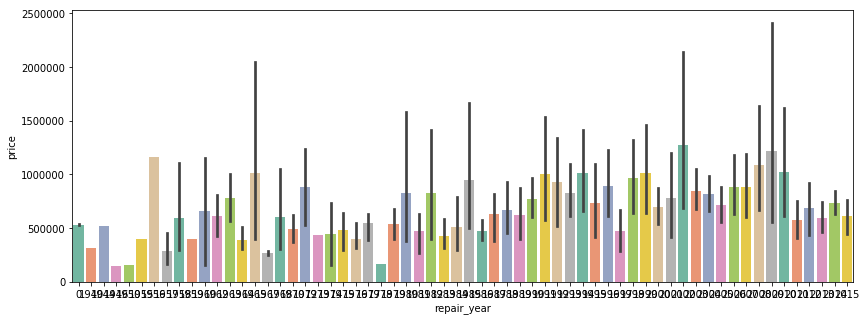

In [21]:
plt.figure(figsize=(14,5))
sns.barplot(x='repair_year', y='price', data=train, palette = 'Set2')

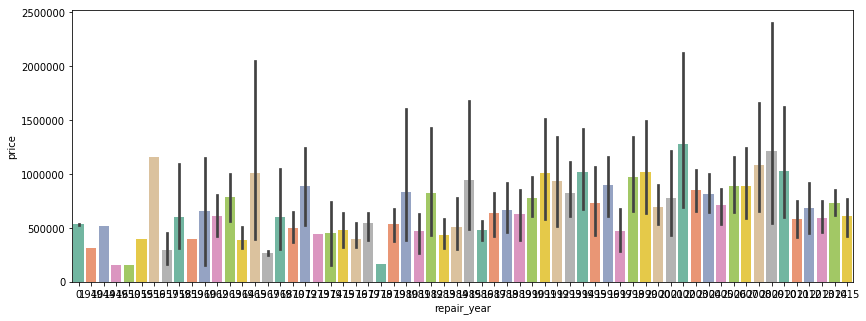

In [25]:
plt.figure(figsize=(14,5))
sns.barplot(x='repair_year', y='price', data=train, palette = 'Set2')